First few rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Missing values in each column:
sepal_length    0
sepal_width     0
petal_leng

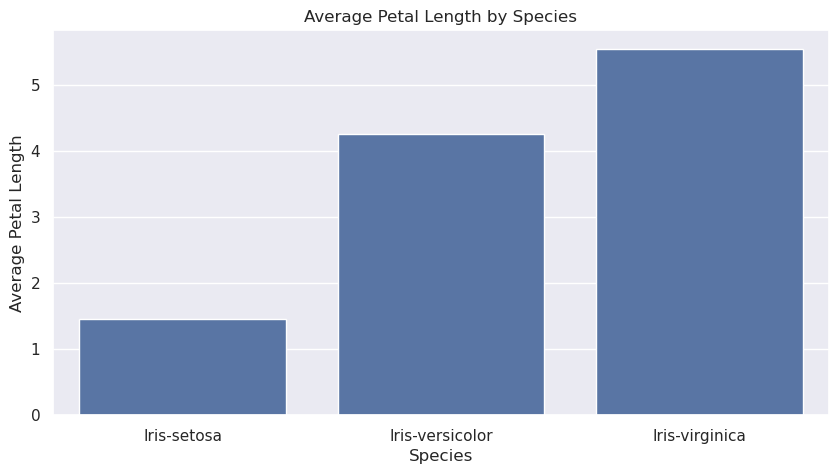

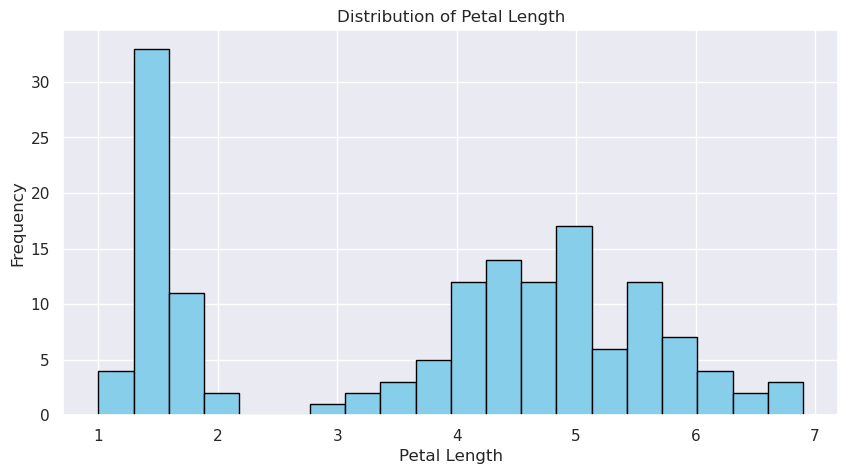

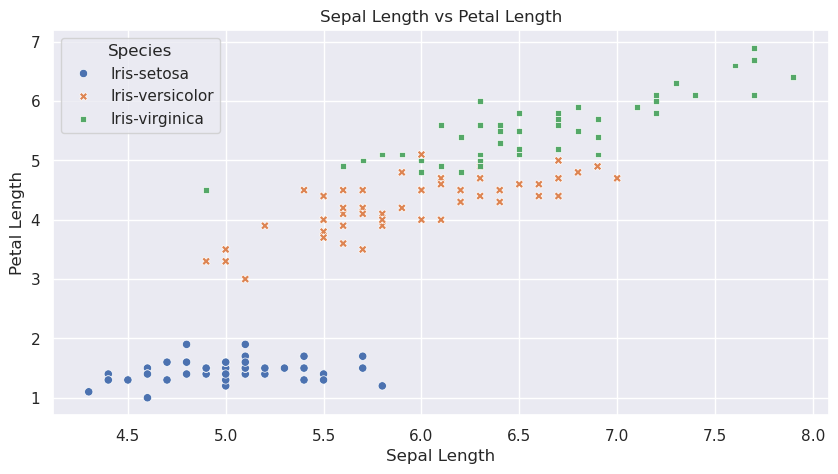

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better aesthetics
sns.set()

# Task 1: Load and Explore the Dataset
# Define column names for the Iris dataset
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load the dataset
try:
    df = pd.read_csv('iris.data', header=None, names=column_names)

    # Display the first few rows
    print("First few rows of the dataset:")
    print(df.head())

    # Explore dataset structure
    print("\nDataset Info:")
    print(df.info())

    # Check for missing values
    print("\nMissing values in each column:")
    print(df.isnull().sum())

except FileNotFoundError:
    print("Error: The file 'iris.data' was not found. Please check the path.")

# Task 2: Basic Data Analysis
if 'df' in locals():
    # Compute basic statistics
    print("\nBasic statistics of numerical columns:")
    print(df.describe())

    # Group by species and calculate mean for numerical columns
    grouped_data = df.groupby('species').mean()
    print("\nMean values grouped by species:")
    print(grouped_data)

    # Observations
    print("\nObservations:")
    print("The average petal length and width vary significantly across species.")

# Task 3: Data Visualization
if 'df' in locals():
    # Line chart (not applicable here, so skipping)

    # Bar chart for average petal length per species
    plt.figure(figsize=(10, 5))
    sns.barplot(x=grouped_data.index, y=grouped_data['petal_length'])
    plt.title('Average Petal Length by Species')
    plt.xlabel('Species')
    plt.ylabel('Average Petal Length')
    plt.show()

    # Histogram of petal length
    plt.figure(figsize=(10, 5))
    plt.hist(df['petal_length'], bins=20, color='skyblue', edgecolor='black')
    plt.title('Distribution of Petal Length')
    plt.xlabel('Petal Length')
    plt.ylabel('Frequency')
    plt.show()

    # Scatter plot to visualize the relationship between sepal length and petal length
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x='sepal_length', y='petal_length', data=df, hue='species', style='species')
    plt.title('Sepal Length vs Petal Length')
    plt.xlabel('Sepal Length')
    plt.ylabel('Petal Length')
    plt.legend(title='Species')
    plt.show()